### Assignment 1| CSC 478-701| James Cooper | 9-18-2017

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import os
os.getcwd()

'C:\\Users\\James Cooper\\Desktop\\DePaul\\Programming Machine Learning'

In [4]:
data = pd.read_csv('bank_data.csv', index_col = 0)

In [5]:
data.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


### 1. Exploratory Analysis

#### Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distribution of values associated with categorical attributes, etc

In [39]:
data.columns

Index([u'age', u'income', u'children', u'gender', u'region', u'married',
       u'car', u'savings_acct', u'current_acct', u'mortgage', u'pep'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, ID12101 to ID12700
Data columns (total 16 columns):
age             600 non-null int64
income          600 non-null float64
children        600 non-null int64
gender          600 non-null object
region          600 non-null object
married         600 non-null object
car             600 non-null object
savings_acct    600 non-null object
current_acct    600 non-null object
mortgage        600 non-null object
pep             600 non-null object
normal_inc      600 non-null float64
normal_age      600 non-null float64
normal_chil     600 non-null float64
old_young       600 non-null category
z_income        600 non-null float64
dtypes: category(1), float64(5), int64(2), object(8)
memory usage: 95.7+ KB


In [8]:
data.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [9]:
data.describe(include='all')

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600.000000,600.000000,600.000000,600,600,600,600,600,600,600,600
unique,NaN,NaN,NaN,2,4,2,2,2,2,2,2
top,NaN,NaN,NaN,MALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,NaN,NaN,NaN,300,269,396,304,414,455,391,326
mean,42.395000,27524.031217,1.011667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14.424947,12899.468246,1.056752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,5014.210000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,30.000000,17264.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,42.000000,24925.300000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55.250000,36172.675000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.var()

age         2.080791e+02
income      1.663963e+08
children    1.116725e+00
dtype: float64

In [34]:
data['married'].value_counts()

YES    396
NO     204
Name: married, dtype: int64

In [35]:
data['savings_acct'].value_counts()

YES    414
NO     186
Name: savings_acct, dtype: int64

In [40]:
data['region'].value_counts()

INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
Name: region, dtype: int64

In [36]:
data.groupby(data['region']).describe()

age                                                        \
            count       mean        std   min    25%   50%    75%   max   
region                                                                    
INNER_CITY  269.0  41.992565  14.987306  18.0  28.00  41.0  56.00  67.0   
RURAL        96.0  43.010417  14.396268  18.0  31.00  44.0  55.25  67.0   
SUBURBAN     62.0  43.725806  15.222039  18.0  30.25  45.0  58.00  67.0   
TOWN        173.0  42.202312  13.299309  19.0  33.00  41.0  52.00  67.0   

           children             ...              income                \
              count      mean   ...     75%  max  count          mean   
region                          ...                                     
INNER_CITY    269.0  0.951673   ...     2.0  3.0  269.0  26843.999963   
RURAL          96.0  1.229167   ...     2.0  3.0   96.0  30027.605417   
SUBURBAN       62.0  0.967742   ...     2.0  3.0   62.0  28656.356935   
TOWN          173.0  1.000000   ...     2.0  3.0  173.0  26786.349653   

                                                                            
                     std      min        25%       50%        75%      max  
region                                                                      
INNER_CITY  13015.863373  6294.21  16352.200  24262.80  36166.200  61554.6  
RURAL       13699.154297  8639.24  19543.175  27630.15  41750.600  57398.1  
SUBURBAN    13888.950040  8143.75  17672.975  25430.00  37291.175  63130.1  
TOWN        11756.638715  5014.21  18504.300  24867.60  33204.300  59803.9  

[4 rows x 24 columns]

In [20]:
ages_rep = data.age
ages_rep.value_counts().sort_index()

18    11
19    10
20    16
21     8
22    15
23    17
24    10
25    10
26    10
27    19
28     9
29     9
30    12
31    10
32     9
33     8
34    12
35    14
36    16
37    12
38    12
39    12
40    20
41    12
42    10
43    20
44    11
45     9
46    14
47    17
48    16
49    12
50     7
51     7
52    15
53     8
54     8
55     3
56    13
57    10
58    19
59    10
60     8
61    14
62     8
63    13
64    20
65    11
66    10
67    14
Name: age, dtype: int64

#### Income is fairly evenly distributed by gender with the mean in females slightly higher, but a bit wider of a range of IQR values for Males

age: The mean is 42.395 years old and the standard deviation is 14.425 years old. The range of age is between 18 and 67 years old while the 25% quantile is at 30 years old, the 50% quantile is at 42 years and the 75% quantile is at 55.25 years old.

income: The mean is 27,524.0312 dollars and the standard deviation is 12,899.4682 dollars. The range of income is between 5,014.21 and 63,130.1 dollars while the 25% quantile is at 17,264.5 dollars, the 50% quantile is at 36,172.675 dollars and the 75% quantile is at 36,172.675 dollars.

children: The mean is 1 child and the standard deviation is also 1 child. The range children is between 0 and 3 children while the 25% quantile is at zero child, the 50% quantile is at 1 child and 75% quantile is at 2 children.

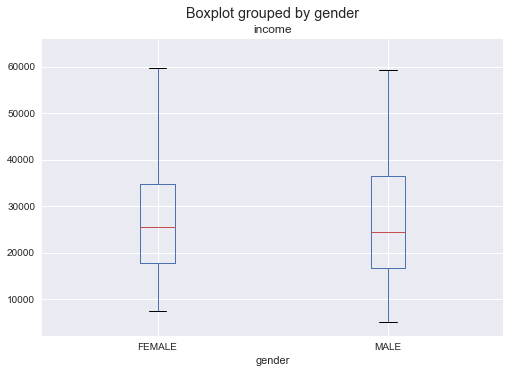

In [19]:
data.boxplot(column='income', by='gender')

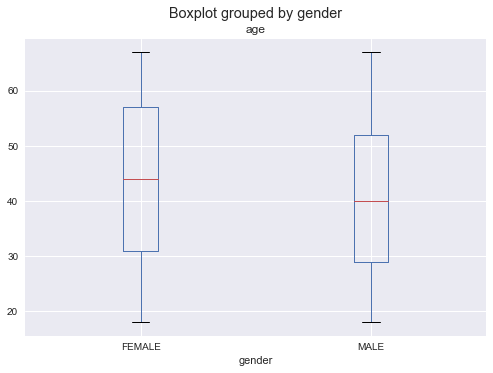

In [63]:
data.boxplot(column='age', by='gender')

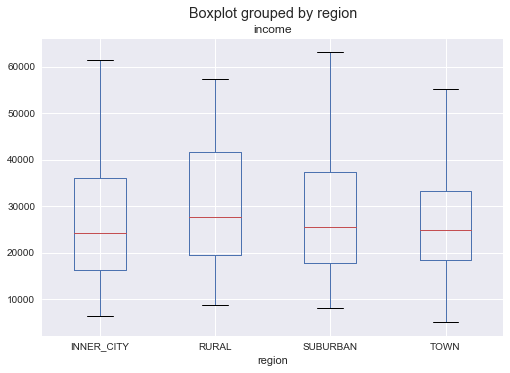

In [65]:
data.boxplot(column='income', by='region')

In [67]:
pd.crosstab(data['region'], data['children'])

children,0,1,2,3
region,,,,
INNER_CITY,121,65,58,25
RURAL,37,18,23,18
SUBURBAN,29,11,17,5
TOWN,76,41,36,20


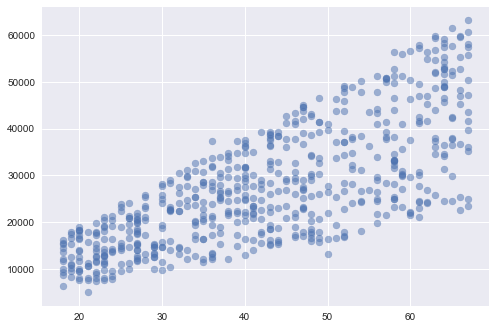

In [25]:
plt.scatter(data['age'], data['income'], alpha=0.5)

#### Looking at only the numerical attributes, it is clear that age and income are highly correlated

In [26]:
d1 = data.corr()
d1

,age,income,children
age,1.000000,0.752726,0.023572
income,0.752726,1.000000,0.036761
children,0.023572,0.036761,1.000000


### 2. PEP Customer Analysis

#### Suppose that because of the bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations

With some preliminary analysis, pep customers are more likely to have slightly higher incomes, tend to be older and have slightly less children. Less customers in the data have purchased pep than those that have not. The inner-city has the most pep purchases, but are also the most represented in the data. In every region, the pep customers have higher incomes and in every region but the suburban region, more customers did not buy pep than did. A slight majority of males and females did not purchase pep. Those with mortgages make up less of the folks who purchased pep.

In [58]:
data.groupby(data['pep']).mean()

,age,income,children,normal_inc,normal_age,normal_chil,z_income
pep,,,,,,,
NO,40.098160,24900.953374,1.067485,0.342191,0.450983,0.355828,-0.203348
YES,45.127737,30644.919453,0.945255,0.441028,0.553627,0.315085,0.241939


In [33]:
data['pep'].value_counts()

NO     326
YES    274
Name: pep, dtype: int64

In [96]:
data.pivot_table(index='pep', columns='gender')

age             children                  income                \
gender     FEMALE       MALE    FEMALE      MALE        FEMALE          MALE   
pep                                                                            
NO      41.100000  39.006410  1.052941  1.083333  25459.110294  24292.705449   
YES     47.084615  43.361111  0.992308  0.902778  30933.551692  30384.348681   

       normal_age           normal_chil           normal_inc            \
gender     FEMALE      MALE      FEMALE      MALE     FEMALE      MALE   
pep                                                                      
NO       0.471429  0.428702    0.350980  0.361111   0.351795  0.331725   
YES      0.593564  0.517574    0.330769  0.300926   0.445994  0.436544   

        z_income            
gender    FEMALE      MALE  
pep                         
NO     -0.160078 -0.250501  
YES     0.264315  0.221739

In [97]:
data.pivot_table(index='pep', columns='region', values='income')

region,INNER_CITY,RURAL,SUBURBAN,TOWN
pep,,,,
NO,25030.376712,27900.27680,23867.310000,23529.189020
YES,28996.756016,32339.91913,32600.277941,31465.650845


In [39]:
pd.crosstab(data['region'], data['pep'])

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


pep      NO  YES
gender          
FEMALE  170  130
MALE    156  144


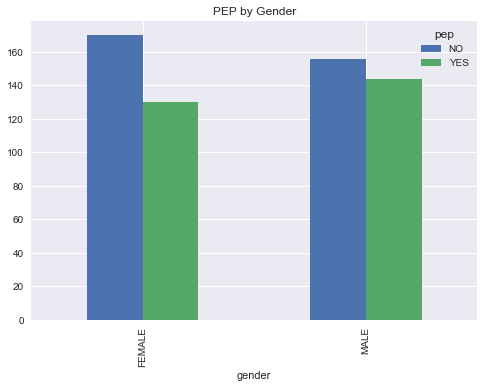

In [60]:
gen_pep = pd.crosstab(data['gender'], data['pep'])
print gen_pep

plt.show(gen_pep.plot(kind='bar', title='PEP by Gender'))

In [61]:
pd.crosstab(data['pep'], data['car'])

car,NO,YES
pep,,
NO,168,158
YES,136,138


mortgage   NO  YES
pep               
NO        209  117
YES       182   92


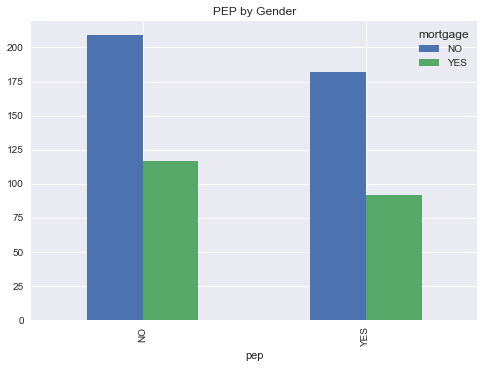

In [62]:
mortgage_pep = pd.crosstab(data['pep'], data['mortgage']) 
print mortgage_pep

plt.show(mortgage_pep.plot(kind='bar', title='PEP by Gender'))



In [58]:
pd.crosstab(data['pep'], data['car']) 

car,NO,YES
pep,,
NO,168,158
YES,136,138


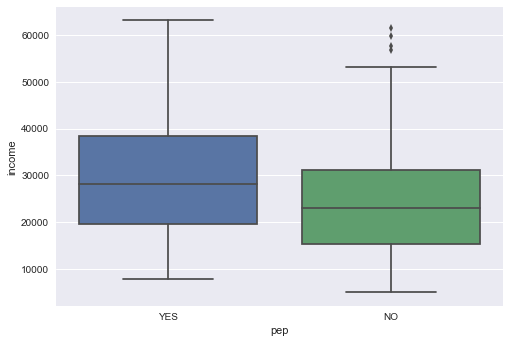

In [7]:
_ = sns.boxplot(x='pep', y='income', data=data)
plt.show()

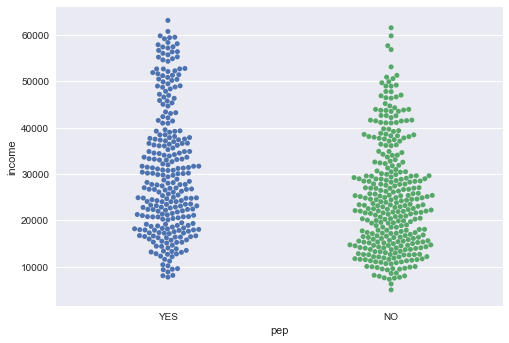

In [64]:
sns.swarmplot(x='pep', y='income', data = data)
plt.show()

In [38]:
gender_group = data.groupby('pep')
gender_group.describe()

age                                                     children  \
     count       mean        std   min   25%   50%   75%   max    count   
pep                                                                       
NO   326.0  40.098160  14.123506  18.0  27.0  40.0  51.0  67.0    326.0   
YES  274.0  45.127737  14.327991  18.0  34.0  45.0  58.0  67.0    274.0   

                ...              income                                       \
         mean   ...     75%  max  count          mean           std      min   
pep             ...                                                            
NO   1.067485   ...     2.0  3.0  326.0  24900.953374  11661.123422  5014.21   
YES  0.945255   ...     1.0  3.0  274.0  30644.919453  13609.613043  7756.36   

                                             
           25%       50%       75%      max  
pep                                          
NO   15366.475  23105.00  31210.90  61554.6  
YES  19639.475  28080.05  38458.35  63130.1  

[2 rows x 24 columns]

### 3. Z-Score Normalization

#### Use z-score normalization to standardize the values of the income attribute. Do not change the original income attribute in the table.

In [45]:
z_income = (data['income'] - data['income'].mean()) / data['income'].std()
z_income.head()

id
ID12101   -0.773523
ID12102    0.198541
ID12103   -0.848766
ID12104   -0.554180
ID12105    1.787071
Name: income, dtype: float64

### 4. Discretiziation

#### Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.

In [46]:
old_young = pd.qcut(data.age, 3)
old_young.head(10)

id
ID12101      (35.0, 49.0]
ID12102      (35.0, 49.0]
ID12103      (49.0, 67.0]
ID12104    (17.999, 35.0]
ID12105      (49.0, 67.0]
ID12106      (49.0, 67.0]
ID12107    (17.999, 35.0]
ID12108      (49.0, 67.0]
ID12109      (35.0, 49.0]
ID12110      (49.0, 67.0]
Name: age, dtype: category
Categories (3, interval[float64]): [(17.999, 35.0] < (35.0, 49.0] < (49.0, 67.0]]

In [47]:
old_young = pd.qcut(data.age, [0, .33, .66, 1], labels = ['young', 'mid-age', 'old'])
old_young

id
ID12101    mid-age
ID12102    mid-age
ID12103        old
ID12104      young
ID12105        old
ID12106        old
ID12107      young
ID12108        old
ID12109    mid-age
ID12110        old
ID12111        old
ID12112        old
ID12113    mid-age
ID12114        old
ID12115    mid-age
ID12116    mid-age
ID12117    mid-age
ID12118    mid-age
ID12119        old
ID12120      young
ID12121        old
ID12122        old
ID12123        old
ID12124      young
ID12125      young
ID12126        old
ID12127    mid-age
ID12128    mid-age
ID12129    mid-age
ID12130        old
            ...   
ID12671    mid-age
ID12672    mid-age
ID12673      young
ID12674    mid-age
ID12675    mid-age
ID12676    mid-age
ID12677      young
ID12678        old
ID12679      young
ID12680    mid-age
ID12681        old
ID12682      young
ID12683    mid-age
ID12684    mid-age
ID12685      young
ID12686      young
ID12687      young
ID12688    mid-age
ID12689        old
ID12690      young
ID12691      young
ID12692  

### 5. Min-Max Normalization

#### Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0.

In [48]:
#create min and max variables for each attribute
min_income = data['income'].min()
max_income = data['income'].max()
min_age = data['age'].min()
max_age = data['age'].max()
min_chil = data['children'].min()
max_chil = data['children'].max()

print min_income, max_income, min_age, max_age, min_chil, max_chil

5014.21 63130.1 18 67 0 3


In [49]:
#apply min-max normalization
normal_inc = (data['income'] - min_income) / (max_income-min_income)
normal_age = (data['age'] - min_age) / (max_age-min_age)
normal_chil = (data['children'] - min_chil) / (max_chil-min_chil)
print normal_inc.head()
print normal_age.head()
print normal_chil.head()

id
ID12101    0.215634
ID12102    0.431395
ID12103    0.198933
ID12104    0.264320
ID12105    0.783987
Name: income, dtype: float64
id
ID12101    0.612245
ID12102    0.448980
ID12103    0.673469
ID12104    0.102041
ID12105    0.795918
Name: age, dtype: float64
id
ID12101    0.333333
ID12102    1.000000
ID12103    0.000000
ID12104    1.000000
ID12105    0.000000
Name: children, dtype: float64


In [50]:
#concatenate z-score, discretized, and min-max variables to data set

data['normal_inc'] = normal_inc
data['normal_age'] = normal_age
data['normal_chil'] = normal_chil
data['old_young'] = old_young
data['z_income'] = z_income
data.head(25)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,normal_inc,normal_age,normal_chil,old_young,z_income
id,,,,,,,,,,,,,,,,
ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,0.215634,0.612245,0.333333,mid-age,-0.773523
ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.431395,0.448980,1.000000,mid-age,0.198541
ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,0.198933,0.673469,0.000000,old,-0.848766
ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,0.264320,0.102041,1.000000,young,-0.554180
ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,0.783987,0.795918,0.000000,old,1.787071
ID12106,57,37869.60,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES,0.565343,0.795918,0.666667,old,0.802015
ID12107,22,8877.07,0,MALE,RURAL,NO,NO,NO,YES,NO,YES,0.066468,0.081633,0.000000,young,-1.445560
ID12108,58,24946.60,0,MALE,TOWN,YES,YES,YES,YES,NO,NO,0.342977,0.816327,0.000000,old,-0.199809
ID12109,37,25304.30,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO,0.349132,0.387755,0.666667,mid-age,-0.172079


### 6. Standard Spreadsheet Form

#### Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). Then numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submitit along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [51]:
data_dum = pd.get_dummies(data)
data_dum.head(10)

,age,income,children,normal_inc,normal_age,normal_chil,z_income,gender_FEMALE,gender_MALE,region_INNER_CITY,...,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,old_young_mid-age,old_young_old,old_young_young
id,,,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.00,1,0.215634,0.612245,0.333333,-0.773523,1,0,1,...,0,1,0,1,0,0,1,1,0,0
ID12102,40,30085.10,3,0.431395,0.448980,1.000000,0.198541,0,1,0,...,0,0,1,0,1,1,0,1,0,0
ID12103,51,16575.40,0,0.198933,0.673469,0.000000,-0.848766,1,0,1,...,1,0,1,1,0,1,0,0,1,0
ID12104,23,20375.40,3,0.264320,0.102041,1.000000,-0.554180,1,0,0,...,0,0,1,1,0,1,0,0,0,1
ID12105,57,50576.30,0,0.783987,0.795918,0.000000,1.787071,1,0,0,...,1,1,0,1,0,1,0,0,1,0
ID12106,57,37869.60,2,0.565343,0.795918,0.666667,0.802015,1,0,0,...,1,0,1,1,0,0,1,0,1,0
ID12107,22,8877.07,0,0.066468,0.081633,0.000000,-1.445560,0,1,0,...,0,0,1,1,0,0,1,0,0,1
ID12108,58,24946.60,0,0.342977,0.816327,0.000000,-0.199809,0,1,0,...,1,0,1,1,0,1,0,0,1,0
ID12109,37,25304.30,2,0.349132,0.387755,0.666667,-0.172079,1,0,0,...,0,1,0,1,0,1,0,1,0,0


In [49]:
#Write the dummy data to a file 'bank_numeric.csv'
data_dum.to_csv('bank_numeric.csv')

### 7. Correlation Analysis

#### Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can do this by using the corr() function in Pandas or corrcoef function in NumPy]

It can be seen here that income and age are clearly positively correlated with the older population having a higher income. The dummy variables also show that the older population is highly positively correlated and the younger population is negatively correlated. The older population also tends to have more children as one would guess, with a correlation of 0.62. Somewhat curiously, the middle age population is slightly negatively correlated with children. Those with savings accounts are positively correlated with income as expected and females are slightly positively correlated with income and children, whereas males are negatively correlated. Married incomes seem to be slightly negatively correlated with income and positively with not married.

In [93]:
d = data_dum.corr()
d

,age,income,children,normal_inc,normal_age,normal_chil,z_income,gender_FEMALE,gender_MALE,region_INNER_CITY,...,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,old_young_mid-age,old_young_old,old_young_young
age,1.000000,0.752726,0.023572,0.752726,1.000000,0.023572,0.752726,0.090081,-0.090081,-0.025171,...,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825,0.005388,0.822813,-0.817337
income,0.752726,1.000000,0.036761,1.000000,0.752726,0.036761,1.000000,0.023845,-0.023845,-0.047564,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,-0.009788,0.617752,-0.600078
children,0.023572,0.036761,1.000000,0.036761,0.023572,1.000000,0.036761,0.014206,-0.014206,-0.051222,...,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663,-0.071814,0.052670,0.018426
normal_inc,0.752726,1.000000,0.036761,1.000000,0.752726,0.036761,1.000000,0.023845,-0.023845,-0.047564,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,-0.009788,0.617752,-0.600078
normal_age,1.000000,0.752726,0.023572,0.752726,1.000000,0.023572,0.752726,0.090081,-0.090081,-0.025171,...,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825,0.005388,0.822813,-0.817337
normal_chil,0.023572,0.036761,1.000000,0.036761,0.023572,1.000000,0.036761,0.014206,-0.014206,-0.051222,...,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663,-0.071814,0.052670,0.018426
z_income,0.752726,1.000000,0.036761,1.000000,0.752726,0.036761,1.000000,0.023845,-0.023845,-0.047564,...,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,-0.009788,0.617752,-0.600078
gender_FEMALE,0.090081,0.023845,0.014206,0.023845,0.090081,0.014206,0.023845,1.000000,-1.000000,-0.023459,...,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843,-0.074928,0.099246,-0.024487
gender_MALE,-0.090081,-0.023845,-0.014206,-0.023845,-0.090081,-0.014206,-0.023845,-1.000000,1.000000,0.023459,...,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843,0.074928,-0.099246,0.024487
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.047564,-0.025171,-0.051222,-0.047564,-0.023459,0.023459,1.000000,...,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054,-0.097058,0.030148,0.065404


In [95]:
d.to_csv('corr_table.csv')

### 8. Scatter Plots: Age vs. Income

#### Create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

There is a clear linear relationship between age and income, as one ages, income rises steadily.

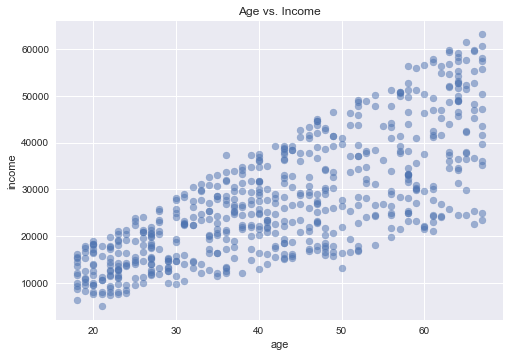

In [28]:
plt.scatter(data['age'], data['income'], alpha = .5)
plt.xlabel('age')
plt.ylabel('income')
plt.title('Age vs. Income')
plt.show()

### 9. Create Histograms for Income and Age

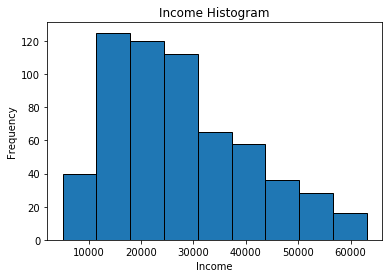

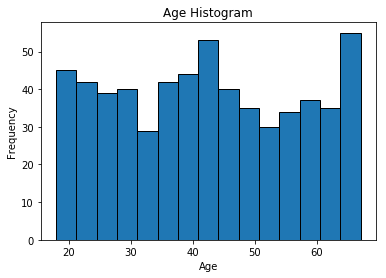

In [57]:
#9 - Create Histograms for Income and Age

plt.hist(data['income'], bins=9, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Histogram')
plt.show()

plt.hist(data['age'], bins=15, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()

### 10. Bar Chart of Regional Distribution

#### Using a bargraph, plot the distribution of the values of the region attribute.

INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
dtype: int64


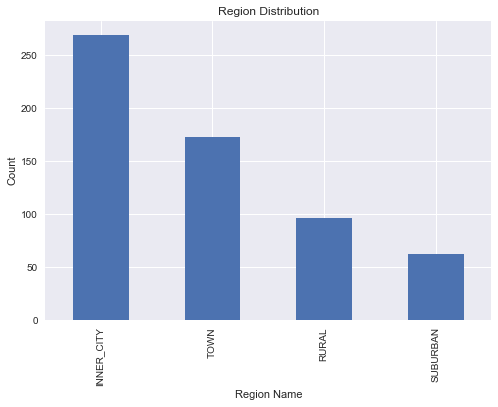

In [83]:
region_count = pd.value_counts(data['region'].values)
print region_count

region_count.plot.bar()
plt.xlabel('Region Name')
plt.ylabel('Count')
plt.title('Region Distribution')

### 11. Cross Tabulation of Region and pep

#### Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables.

pep          NO  YES
region              
INNER_CITY  146  123
RURAL        50   46
SUBURBAN     28   34
TOWN        102   71


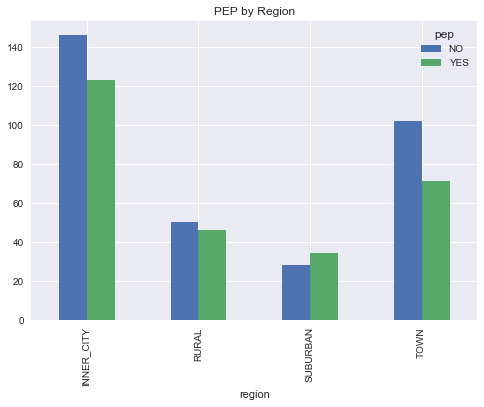

In [90]:
cross = pd.crosstab(data['region'], data['pep'])
print cross

plt.show(cross.plot(kind='bar', title='PEP by Region'))
